In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [117]:
a = 20

X = [a]
Y = [a]

t = [0]

In [118]:
tend = 800
V = 150 # Total volume, not sure about this. Its depicted as Ω in the paper.
Ca = 1
Cb = 2.5
Na = Ca*V
Nb = Cb*V
k1 = 1
k2 = 1
k3 = 1
k4 = 1

In [119]:
while t[-1] < tend:
    
    props = [ k1*Ca*V , k2*X[-1], k3*Cb*X[-1], (k4*X[-1]*(X[-1]-1)*Y[-1])/(V**2) ]
    
    prop_sum = sum(props)
    
    if prop_sum == 0:
        break
    
    tau = np.random.exponential(scale=1/prop_sum)
    
    t.append(t[-1] + tau)
    
    rand = random.uniform(0,1)
    
    if rand*prop_sum <= props[0]:
        X.append(X[-1] + 1)
        Y.append(Y[-1])
        
    elif rand*prop_sum > props[0] and rand*prop_sum <= props[0] + props[1]:
        X.append(X[-1] - 1)
        Y.append(Y[-1])   
        
    elif rand*prop_sum > props[0] + props[1] and rand*prop_sum <= props[0] + props[1] + props[2]:
        X.append(X[-1] - 1)
        Y.append(Y[-1] + 1)  
        
    elif rand*prop_sum > props[0] + props[1] + props[2] and rand*prop_sum <= props[0] + props[1] + props[2] + props[3]:
        X.append(X[-1] + 1)
        Y.append(Y[-1] - 1)  

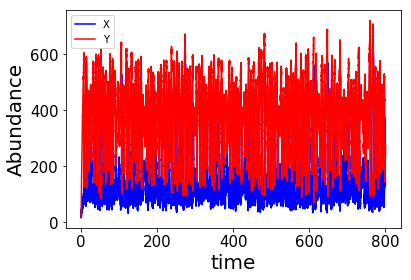

In [120]:
X_plot, = plt.plot(t, X, label="X", color='blue')
Y_plot, = plt.plot(t, Y, label="Y", color='red')

plt.legend(handles=[X_plot, Y_plot])
plt.xlabel('time', fontsize='20')
plt.ylabel('Abundance', fontsize='20')
#plt.xlim(0,800)
#plt.ylim(0,10)
plt.tick_params(labelsize=15)

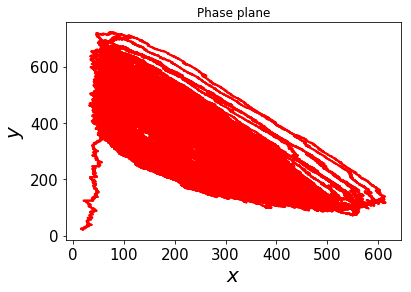

In [121]:
plt.scatter(X, Y, s=1, facecolors='none', edgecolors='red')
plt.ylabel(r'$y$', fontsize='20')
plt.xlabel(r'$x$', fontsize='20')
plt.tick_params(labelsize=15)
plt.title('Phase plane')
plt.savefig('/Users/κωτς/Desktop/stochasticplane.pdf', transparent=True, bbox_inches='tight')